In [1]:
import os
import sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud
from datetime import datetime, timedelta

In [2]:
os.chdir('..') 

In [3]:
from src.loader import SlackDataLoader
from src.config import cfg
import src.utils as utils

Output File: slack_data.csv
Path: data\Anonymized_B6SlackExport_25Nov23\anonymized
Channel: data\Anonymized_B6SlackExport_25Nov23\anonymized\channels.json
Userfile: data\Anonymized_B6SlackExport_25Nov23\anonymized\users.json


In [4]:
slack_data_loader = SlackDataLoader(cfg.path)
user_names_by_id, user_ids_by_name = slack_data_loader.get_user_map()

In [5]:
all_channel_messages = []
for channel in slack_data_loader.channels:
    channel_name = channel['name']
    channel_messages = slack_data_loader.get_channel_messages(channel_name)
    all_channel_messages.extend(channel_messages)

In [6]:
# Convert the list of messages into a DataFrame
all_channel_messages_df = pd.DataFrame(all_channel_messages)

In [7]:
# Convert the 'ts' column to float
all_channel_messages_df['ts'] = all_channel_messages_df['ts'].astype(float)

In [8]:
all_channel_messages_df['ts'] = all_channel_messages_df['ts'].astype(float)
all_channel_messages_df['time_difference_messages'] = all_channel_messages_df['ts'].diff()

In [9]:
# Sort the DataFrame by timestamp
all_channel_messages_df = all_channel_messages_df.sort_values(by='ts')

In [10]:
# Calculate the time differences for all events (messages, replies, reactions)
all_channel_messages_df['time_difference_events'] = all_channel_messages_df['ts'].diff()

In [11]:
# Convert timestamps to human-readable format
all_channel_messages_df['timestamp_events'] = utils.convert_2_timestamp('ts', all_channel_messages_df)

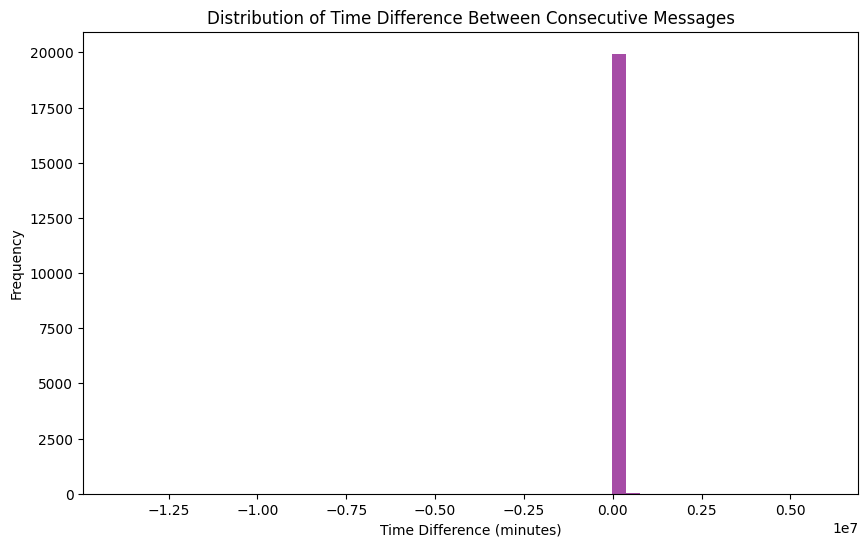

In [65]:
# Plot histogram of time differences between consecutive events
plt.figure(figsize=(10, 6))
plt.hist(all_channel_messages_df['time_difference_messages'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Time Difference Between Consecutive Messages (in minutes)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Calculate the time differences for consecutive replies
all_channel_messages_df['time_difference_replies'] = all_channel_messages_df[all_channel_messages_df['subtype'] == 'thread_broadcast']['ts'].diff()

In [57]:
# Convert timestamps to human-readable format
all_channel_messages_df['timestamp_replies'] = utils.convert_2_timestamp('ts', all_channel_messages_df)

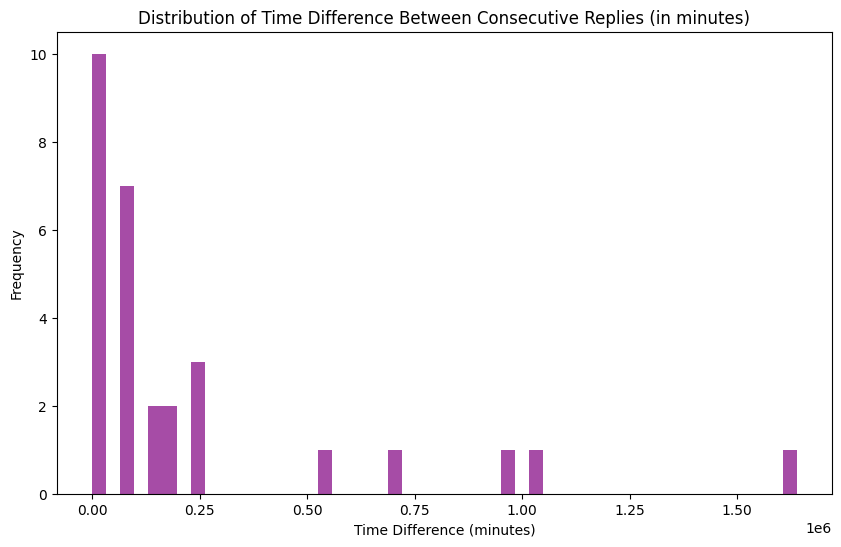

In [58]:
# Plot histogram of time differences between consecutive replies with bins every minute
plt.figure(figsize=(10, 6))
plt.hist(all_channel_messages_df['time_difference_replies'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Time Difference Between Consecutive Replies (in minutes)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Initialize an empty list to store time differences of reactions
time_differences_reactions = []

In [42]:
# Calculate the time differences for consecutive reactions
for i in range(1, len(all_channel_messages_df)):
    reactions = all_channel_messages_df.iloc[i]['reactions']
    if reactions:
        time_diff = all_channel_messages_df.iloc[i]['ts'] - all_channel_messages_df.iloc[i - 1]['ts']
        time_differences_reactions.append(time_diff)
    else:
        time_differences_reactions.append(None)

In [43]:
# Convert the list to a DataFrame column
all_channel_messages_df['time_difference_reactions'] = [None] + time_differences_reactions

In [44]:
# Convert timestamps to human-readable format
all_channel_messages_df['timestamp_reactions'] = utils.convert_2_timestamp('ts', all_channel_messages_df)

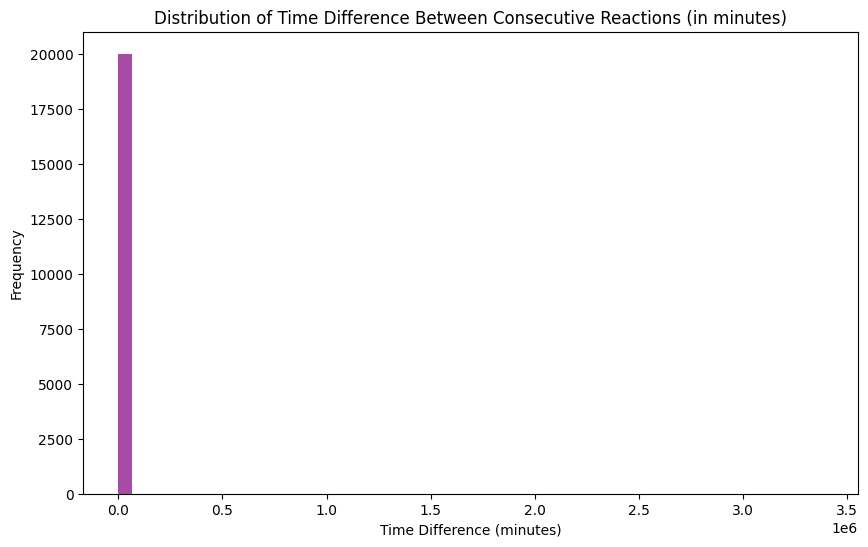

In [45]:
# Plot histogram of time differences between consecutive reactions with bins every minute
plt.figure(figsize=(10, 6))
plt.hist(all_channel_messages_df['time_difference_reactions'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Time Difference Between Consecutive Reactions (in minutes)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Initialize an empty list to store time differences
time_differences_events = []

In [60]:
# Calculate the time differences for consecutive events (message, reply, reaction)
for i in range(1, len(all_channel_messages_df)):
    time_diff = all_channel_messages_df.iloc[i]['ts'] - all_channel_messages_df.iloc[i - 1]['ts']
    time_differences_events.append(time_diff)

In [61]:
# Convert the list to a DataFrame column
all_channel_messages_df['time_difference_events'] = [None] + time_differences_events

In [62]:
# Convert timestamps to human-readable format
all_channel_messages_df['timestamp_events'] = utils.convert_2_timestamp('ts', all_channel_messages_df)

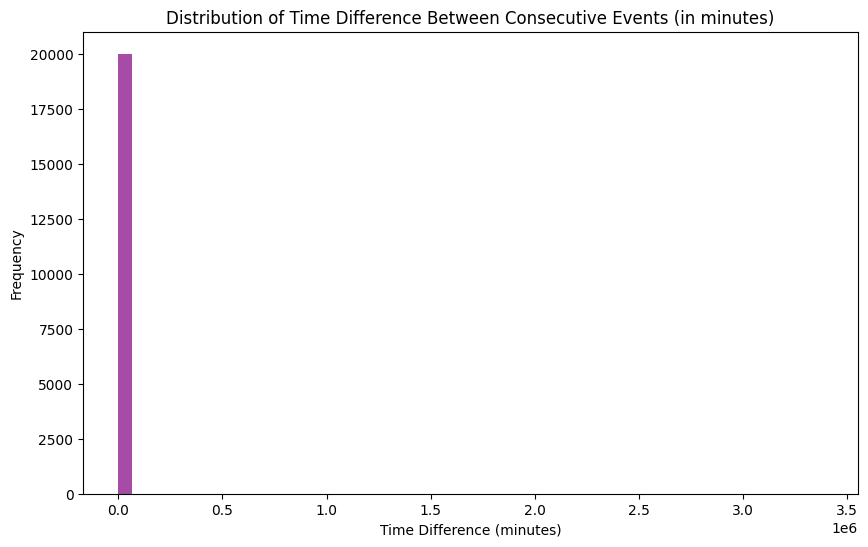

In [63]:
# Plot histogram of time differences between consecutive events with bins every minute
plt.figure(figsize=(10, 6))
plt.hist(all_channel_messages_df['time_difference_events'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Time Difference Between Consecutive Events (in minutes)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()